# Final Project Data Wrangling

## A. Pendahuluan
- **Deskripsi dataset**: 'NFL Stadium Attendance', sebuah pak dataset(terdiri dari tiga sub dataset) yang mencatat *Pro Football Reference team standings*. Ada **tiga** buah sub dataset, yaitu:
    1. `attendance.csv` yang berisi kehadiran tim secara mingguan,
    2. `standings.csv` yang berisi hasil komputasi pertandingan tim, dan
    3. `games.csv` yang berisi data pertandingan antara tim yang mentah.

    Ketiga dataset tersebut bisa digabungkan melalui kolom `year`, `team_name`, dan `team`.
- **Alasan dataset menarik**: Seperti yang telah kami sebutkan, dataset ini memiliki **tiga sub dataset** yang di mana bisa **digabungkan** serta kategori **dataset** seperti ini belum pernah kami olah sebelumnya. Dan juga untuk `standings.csv` adalah dataset yang berisi hasil komputasi, yang biasanya dataset umumnya benar-benar murni/mentah namun kami disajikan dengan **dua sub dataset mentah** dan **satu sub dataset yang diolah**.

- **Pertanyaan/tujuan analisis**:
    1.  **Analisis Bisnis & Pasar**: Sejauh mana kualitas performa tim (seperti *Winning Rate* dan *Offensive Ranking*) mempengaruhi loyalitas penggemar dan penjualan tiket? Apakah tim yang bermain buruk selalu ditinggalkan penontonnya?
    2.  **Analisis Strategi Juara**: Apa profil statistik yang membedakan seorang Juara Superbowl dengan tim rata-rata? Apakah serangan (*Offense*) lebih krusial daripada pertahanan (*Defense*) dalam meraih gelar juara?
    3.  **Analisis Faktor Eksternal & Mitos**: Bagaimana faktor di luar kendali pelatih—seperti cuaca (bulan pertandingan), jadwal tayang (*Primetime*), dan jumlah penonton di stadion—mempengaruhi hasil akhir skor pertandingan?

    **Tujuan:**
    - Mengukur dampak ekonomi dari performa tim terhadap *weekly attendance*.
    - Mengidentifikasi "DNA Juara" menggunakan *Simple Rating System (SRS)* untuk mematahkan mitos strategi.
    - Mengevaluasi mitos "Pemain ke-12" (dampak jumlah penonton terhadap margin kemenangan).

## B. Setup \& Package
### 1. Import library & penyesuaian lingkungan notebook
Pada sel berikut kami impor library yang akan digunakan dan melakukan penyesuaian terhadap notebook kami.

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
sns.set_style('whitegrid')

### 2. Penyimpanan path file
Setelah mengimpor library, kami melakukan setup *path* untuk membaca serta menulis dataset.

In [30]:
raw_path = {
    'attendance': '../data/raw/attendance.csv',
    'games': '../data/raw/games.csv',
    'standings': '../data/raw/standings.csv'
}

processed_path = '../data/processed/nfl.csv'


### 3. Penjelasan fungsi paket
- `pandas (pd)`: -
- `numpy (np)`: -
- `matplotlib.pyplot (plt)`: -
- `seaborn (sns)`: -

## C. Data Preparation

### 1. Baca dataset dari data yang ada sesuai *path*

In [31]:
attendance = pd.read_csv(raw_path['attendance'])
games = pd.read_csv(raw_path['games'])
standings = pd.read_csv(raw_path['standings'])

### 2. Proses *Cleaning* dan *Data Wrangling*
- Pembuatan function untuk melakukan *checking* pada dataset:

In [32]:
def cek_data(df):
    print("\nDimensi:",df.shape)
    print("\nTipe Data:\n",df.dtypes)
    print("\nMissing Values:\n",df.isnull().sum())
    print("\nDuplicates:",df.duplicated().sum())

- Pengecekan awal untuk dataset `games`:

In [33]:
print("==== Tahap Pengecekan Awal untuk Data games ====")
cek_data(games)
print("=" * 40, "\n")

==== Tahap Pengecekan Awal untuk Data games ====

Dimensi: (5324, 19)

Tipe Data:
 year               int64
week              object
home_team         object
away_team         object
winner            object
tie               object
day               object
date              object
time              object
pts_win            int64
pts_loss           int64
yds_win            int64
turnovers_win      int64
yds_loss           int64
turnovers_loss     int64
home_team_name    object
home_team_city    object
away_team_name    object
away_team_city    object
dtype: object

Missing Values:
 year                 0
week                 0
home_team            0
away_team            0
winner               0
tie               5314
day                  0
date                 0
time                 0
pts_win              0
pts_loss             0
yds_win              0
turnovers_win        0
yds_loss             0
turnovers_loss       0
home_team_name       0
home_team_city       0
away_team_name     

- Identifikasi setelah pengecekan `games`:
    - Kolom `date` bertipe data `object`, harus diganti menjadi `date` untuk analisis deret waktu yang baik.
    - Kolom `week` bertipe data `object` karena di baris bawah ada data yang berupa istilah. Daripada memformat kolom, kami tambahkan kolom baru yaitu `week_num`.
    - Kolom `tie` banyak missing value, harus diganti dengan `0` untuk menandakan tidak adanya kejadian seri/*tie*.
    - Kolom `time` bertipe data `object`. Akan kami biarkan karena `time` sendiri ambigu karena ada banyak `date`. Kami akan buat kolom baru untuk analisis bernama `kickoff_time`.

- Prosedur penanganan untuk `games`:

In [34]:
games = pd.read_csv(raw_path['games']) # load dataset lagi untuk mencegah error

# Buat kolom dummy untuk ubah tipe data kolom date
games['full_date_str'] = games['date'].astype(str) + ', ' + games['year'].astype(str)

# Ubah tipe data ke datetime
games['date'] = pd.to_datetime(games['full_date_str'])

# Membuat kolom kickoff_time
games['kickoff_time'] = pd.to_datetime(
    games['date'].astype(str) + ' ' + games['time'],
    format='%Y-%m-%d %I:%M%p',
    errors = 'coerce'
)

# Pemetaan kolom week object ke integer
week_map = {
    'WildCard':18,
    'Division':19,
    'ConfChamp':20,
    'SuperBowl':21
}

# Membuat kolom week_num
games['week_num'] = games['week'].replace(week_map).astype(int)

# Mengisi kolom tie yang kosong dengan 0
games['tie'] = games['tie'].fillna(0)

# Cek akhir
print("==== Cek Akhir untuk Data games ====")
cek_data(games)
print("=" * 40, "\n")

==== Cek Akhir untuk Data games ====

Dimensi: (5324, 22)

Tipe Data:
 year                       int64
week                      object
home_team                 object
away_team                 object
winner                    object
tie                       object
day                       object
date              datetime64[ns]
time                      object
pts_win                    int64
pts_loss                   int64
yds_win                    int64
turnovers_win              int64
yds_loss                   int64
turnovers_loss             int64
home_team_name            object
home_team_city            object
away_team_name            object
away_team_city            object
full_date_str             object
kickoff_time      datetime64[ns]
week_num                   int64
dtype: object

Missing Values:
 year              0
week              0
home_team         0
away_team         0
winner            0
tie               0
day               0
date              0
time       

In [35]:
print("Data games setelah dibersihkan:")
games

Data games setelah dibersihkan:


,year,week,home_team,away_team,winner,tie,day,date,time,pts_win,pts_loss,yds_win,turnovers_win,yds_loss,turnovers_loss,home_team_name,home_team_city,away_team_name,away_team_city,full_date_str,kickoff_time,week_num
0,2000,1,Minnesota Vikings,Chicago Bears,Minnesota Vikings,0,Sun,2000-09-03,1:00PM,30,27,374,1,425,1,Vikings,Minnesota,Bears,Chicago,"September 3, 2000",2000-09-03 13:00:00,1
1,2000,1,Kansas City Chiefs,Indianapolis Colts,Indianapolis Colts,0,Sun,2000-09-03,1:00PM,27,14,386,2,280,1,Chiefs,Kansas City,Colts,Indianapolis,"September 3, 2000",2000-09-03 13:00:00,1
2,2000,1,Washington Redskins,Carolina Panthers,Washington Redskins,0,Sun,2000-09-03,1:01PM,20,17,396,0,236,1,Redskins,Washington,Panthers,Carolina,"September 3, 2000",2000-09-03 13:01:00,1
3,2000,1,Atlanta Falcons,San Francisco 49ers,Atlanta Falcons,0,Sun,2000-09-03,1:02PM,36,28,359,1,339,1,Falcons,Atlanta,49ers,San Francisco,"September 3, 2000",2000-09-03 13:02:00,1
4,2000,1,Pittsburgh Steelers,Baltimore Ravens,Baltimore Ravens,0,Sun,2000-09-03,1:02PM,16,0,336,0,223,1,Steelers,Pittsburgh,Ravens,Baltimore,"September 3, 2000",2000-09-03 13:02:00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5319,2019,Division,Kansas City Chiefs,Houston Texans,Kansas City Chiefs,0,Sun,2019-01-12,3:05PM,51,31,434,1,442,1,Chiefs,Kansas City,Texans,Houston,"January 12, 2019",2019-01-12 15:05:00,19
5320,2019,Division,Green Bay Packers,Seattle Seahawks,Green Bay Packers,0,Sun,2019-01-12,6:40PM,28,23,344,0,375,0,Packers,Green Bay,Seahawks,Seattle,"January 12, 2019",2019-01-12 18:40:00,19
5321,2019,ConfChamp,Kansas City Chiefs,Tennessee Titans,Kansas City Chiefs,0,Sun,2019-01-19,3:05PM,35,24,404,0,295,0,Chiefs,Kansas City,Titans,Tennessee,"January 19, 2019",2019-01-19 15:05:00,20
5322,2019,ConfChamp,San Francisco 49ers,Green Bay Packers,San Francisco 49ers,0,Sun,2019-01-19,6:40PM,37,20,354,0,358,3,49ers,San Francisco,Packers,Green Bay,"January 19, 2019",2019-01-19 18:40:00,20


- Pengecekan awal untuk dataset `attendance`:

In [36]:
print("==== Tahap Pengecekan Awal untuk Data attendance ====")
cek_data(attendance)
print("=" * 40, "\n")

==== Tahap Pengecekan Awal untuk Data attendance ====

Dimensi: (10846, 8)

Tipe Data:
 team                  object
team_name             object
year                   int64
total                  int64
home                   int64
away                   int64
week                   int64
weekly_attendance    float64
dtype: object

Missing Values:
 team                   0
team_name              0
year                   0
total                  0
home                   0
away                   0
week                   0
weekly_attendance    638
dtype: int64

Duplicates: 0



- Identifikasi setelah pengecekan `attendance`:
    - Kolom `weekly_attendance` ada 638 missing values, harus di*drop* karena tidak ada permainan yang berlangsung pada waktu itu.
    - Kolom yang sama bertipe data `float64`, harus dikonversi ke `int64` karena jumlah *attendance* tidak mungkin desimal.

- Prosedur penanganan untuk `attendance`:

In [37]:
# Drop missing value
attendance.dropna(subset=['weekly_attendance'], inplace=True)

# Memperbaiki tipe data
attendance['weekly_attendance'] = attendance['weekly_attendance'].astype(int)

# Cek akhir
print("==== Cek Akhir untuk Data attendance ====")
cek_data(attendance)
print("=" * 40, "\n")

==== Cek Akhir untuk Data attendance ====

Dimensi: (10208, 8)

Tipe Data:
 team                 object
team_name            object
year                  int64
total                 int64
home                  int64
away                  int64
week                  int64
weekly_attendance     int64
dtype: object

Missing Values:
 team                 0
team_name            0
year                 0
total                0
home                 0
away                 0
week                 0
weekly_attendance    0
dtype: int64

Duplicates: 0



In [38]:
print("Data attendance setelah dibersihkan:")
attendance

Data attendance setelah dibersihkan:


,team,team_name,year,total,home,away,week,weekly_attendance
0,Arizona,Cardinals,2000,893926,387475,506451,1,77434
1,Arizona,Cardinals,2000,893926,387475,506451,2,66009
3,Arizona,Cardinals,2000,893926,387475,506451,4,71801
4,Arizona,Cardinals,2000,893926,387475,506451,5,66985
5,Arizona,Cardinals,2000,893926,387475,506451,6,44296
...,...,...,...,...,...,...,...,...
10841,Washington,Redskins,2019,1101466,523906,577560,13,71504
10842,Washington,Redskins,2019,1101466,523906,577560,14,77296
10843,Washington,Redskins,2019,1101466,523906,577560,15,63246
10844,Washington,Redskins,2019,1101466,523906,577560,16,66083


- Pengecekan awal untuk dataset `standings`:

In [39]:
print("==== Tahap Pengecekan Awal untuk Data standings ====")
cek_data(standings)
print("=" * 40)

==== Tahap Pengecekan Awal untuk Data standings ====

Dimensi: (638, 15)

Tipe Data:
 team                     object
team_name                object
year                      int64
wins                      int64
loss                      int64
points_for                int64
points_against            int64
points_differential       int64
margin_of_victory       float64
strength_of_schedule    float64
simple_rating           float64
offensive_ranking       float64
defensive_ranking       float64
playoffs                 object
sb_winner                object
dtype: object

Missing Values:
 team                    0
team_name               0
year                    0
wins                    0
loss                    0
points_for              0
points_against          0
points_differential     0
margin_of_victory       0
strength_of_schedule    0
simple_rating           0
offensive_ranking       0
defensive_ranking       0
playoffs                0
sb_winner               0
dtype: int64

- Identifikasi setelah pengecekan `standings`:
    -  Tidak ada kejanggalan yang ditemukan sejauh ini tapi kami akan melakukan koreksi nama kolom untuk penggabungan dataset.

- Prosedur penanganan untuk `standings`:

In [40]:
standing = standings.rename(
    columns={
        'wins': 'seasons_wins',
        'loss': 'season_losses',
        'simple_rating': 'season_rating',
        'offensive_rating': 'off-rank',
        'defensive_ranking': 'def_rank',
        'sb_winner': 'superbowl_winner'
    }
)

### 3. Identifikasi yang lain (*outlier checking*)
- Pengecekan dilakukan pada data `attendance` dan `games` karena keduanya adalah data mentah/murni.


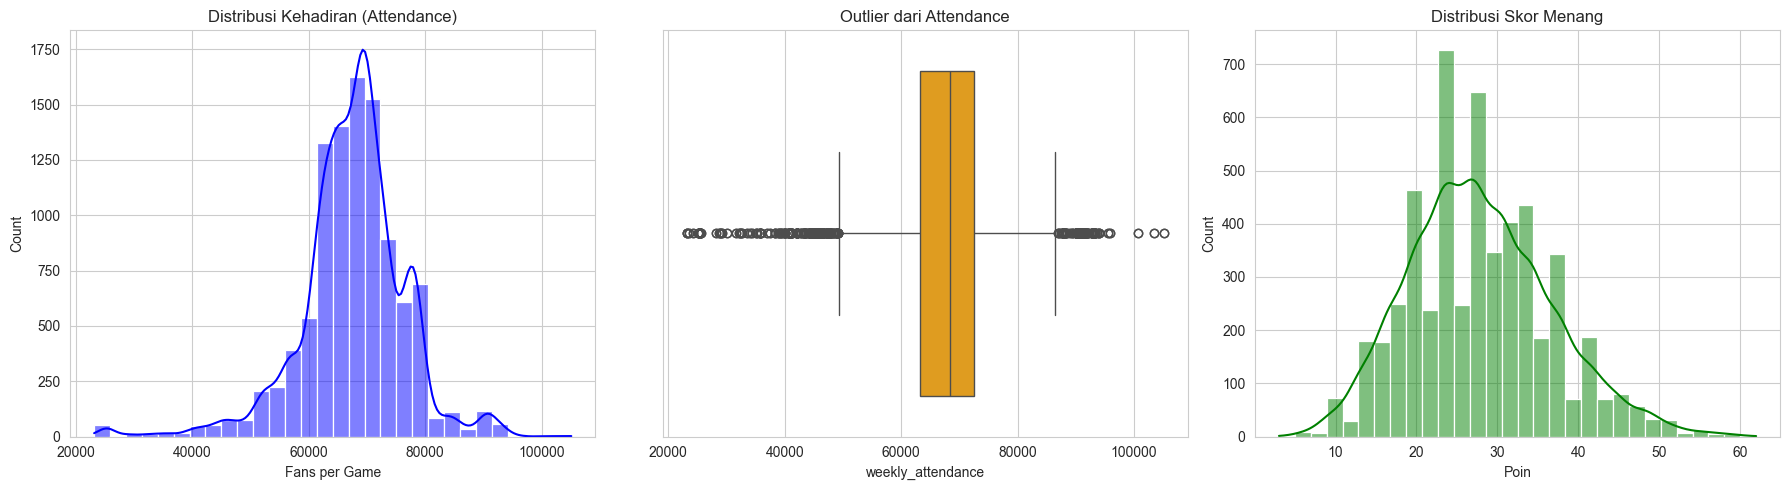

In [41]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.histplot(attendance['weekly_attendance'],
             bins = 30,
             kde = True,
             ax = axes[0],
             color = 'blue')
axes[0].set_title('Distribusi Kehadiran (Attendance)')
axes[0].set_xlabel('Fans per Game')

sns.boxplot(x = attendance['weekly_attendance'],
            ax = axes[1],
            color = 'orange')
axes[1].set_title('Outlier dari Attendance')

sns.histplot(games['pts_win'],
             bins = 30,
             kde = True,
             ax = axes[2],
             color = 'green')
axes[2].set_title('Distribusi Skor Menang')
axes[2].set_xlabel('Poin')

plt.tight_layout()
plt.show()

Tidak ada outlier ekstrem yang terdeteksi dari kedua dataset tersebut untuk kolom yang telah dicek.

### 4. Identifikasi data `standings` tambahan

Karena `standings` adalah dataset yang asalnya dari komputasi, harusnya tidak ada kesalahan. Namun kami coba cek sesuai logika pertandingan, antara lain:
1. Pertandingan *Wins* + *Loses* = *Games* dimainkan? Harusnya ada baris dengan value 16 (15 atau 17 untuk tahun tertentu) saja.
2. Apakah Poin *For* - Poin *Against* sama dengan Poin *Differential*?
3. Ada eror selain *non-zero*?

In [42]:
# Pertandingan Wins + Loses
standings['games_played'] = standings['wins'] + standings['loss']
print('Perhitungan pertandingan Win-Lose\n',
      standings['games_played'].value_counts())

# Poin Differential
standings['calc_diff'] = standings['points_for'] - standings['points_against']
standings['math_error'] = standings['points_differential'] - standings['calc_diff']

# Eror Non-zero
errors = standings[standings['math_error']!=0]
print('\nBaris dengan kesalahan perhitungan:', len(errors))

Perhitungan pertandingan Win-Lose
 games_played
16    618
15     20
Name: count, dtype: int64

Baris dengan kesalahan perhitungan: 0


### 5. Penggabungan ketiga sub dataset

In [43]:
# Penggabungan games dan attendance
base_df = pd.merge(
    games,
    attendance,
    left_on = ['home_team_name', 'year', 'week_num'],
    right_on = ['team_name', 'year', 'week'],
    how = 'inner'
)

# Penggabungan base dan standings
nfl = pd.merge(
    base_df,
    standings,
    left_on = ['home_team_name', 'year'],
    right_on = ['team_name', 'year'],
    how = 'left',
    suffixes = ('', '_standings_dup') # mengatasi nama duplikat
)

# Pembersihan pasca penggabungan data
cols_to_drop = ['team_name', 'week_y', 'week_x']
nfl.drop(columns = cols_to_drop, inplace = True, errors = 'ignore')

# Penamaan baru untuk kolom weekly attendance
nfl.rename(columns = {'weekly_attendance': 'attendance'},
                 inplace = True)

# Membuat kolom untuk menghitung poin home team kalah/menang
def get_home_diff(row):
    if row['home_team'] == row['winner']:
        return row['pts_win'] - row['pts_loss']
    else:
        return row['pts_loss'] - row['pts_win']
    
# Drop kolom yang tidak dipakai
cols_to_remove = [
    'calc_diff', 'math_error', 'games_played', 
    'full_date_str', 'team_standings_dup', 'team_name_standings_dup', 'team'
]

nfl.drop(columns=cols_to_remove, inplace = True, errors = 'ignore')
    
nfl['home_score_diff'] = nfl.apply(get_home_diff, axis = 1)

In [44]:
print("==== Pengecekan akhir dataset final ====")
cek_data(nfl)
print("=" * 40)

==== Pengecekan akhir dataset final ====

Dimensi: (5104, 37)

Tipe Data:
 year                             int64
home_team                       object
away_team                       object
winner                          object
tie                             object
day                             object
date                    datetime64[ns]
time                            object
pts_win                          int64
pts_loss                         int64
yds_win                          int64
turnovers_win                    int64
yds_loss                         int64
turnovers_loss                   int64
home_team_name                  object
home_team_city                  object
away_team_name                  object
away_team_city                  object
kickoff_time            datetime64[ns]
week_num                         int64
total                            int64
home                             int64
away                             int64
attendance                  

In [45]:
print('Dataset yang terolah:')
nfl

Dataset yang terolah:


,year,home_team,away_team,winner,tie,day,date,time,pts_win,pts_loss,yds_win,turnovers_win,yds_loss,turnovers_loss,home_team_name,home_team_city,away_team_name,away_team_city,kickoff_time,week_num,total,home,away,attendance,wins,loss,points_for,points_against,points_differential,margin_of_victory,strength_of_schedule,simple_rating,offensive_ranking,defensive_ranking,playoffs,sb_winner,home_score_diff
0,2000,Minnesota Vikings,Chicago Bears,Minnesota Vikings,0,Sun,2000-09-03,1:00PM,30,27,374,1,425,1,Vikings,Minnesota,Bears,Chicago,2000-09-03 13:00:00,1,1029262,513322,515940,64104,11,5,397,371,26,1.6,0.3,1.9,4.3,-2.3,Playoffs,No Superbowl,3
1,2000,Kansas City Chiefs,Indianapolis Colts,Indianapolis Colts,0,Sun,2000-09-03,1:00PM,27,14,386,2,280,1,Chiefs,Kansas City,Colts,Indianapolis,2000-09-03 13:00:00,1,1115272,631365,483907,78357,7,9,355,354,1,0.1,0.6,0.6,0.1,0.6,No Playoffs,No Superbowl,-13
2,2000,Washington Redskins,Carolina Panthers,Washington Redskins,0,Sun,2000-09-03,1:01PM,20,17,396,0,236,1,Redskins,Washington,Panthers,Carolina,2000-09-03 13:01:00,1,1174332,647424,526908,80257,8,8,281,269,12,0.8,0.2,1.0,-2.9,3.8,No Playoffs,No Superbowl,3
3,2000,Atlanta Falcons,San Francisco 49ers,Atlanta Falcons,0,Sun,2000-09-03,1:02PM,36,28,359,1,339,1,Falcons,Atlanta,49ers,San Francisco,2000-09-03 13:02:00,1,964579,422814,541765,54626,4,12,252,413,-161,-10.1,1.5,-8.6,-5.7,-2.9,No Playoffs,No Superbowl,8
4,2000,Pittsburgh Steelers,Baltimore Ravens,Baltimore Ravens,0,Sun,2000-09-03,1:02PM,16,0,336,0,223,1,Steelers,Pittsburgh,Ravens,Baltimore,2000-09-03 13:02:00,1,987037,440426,546611,55049,9,7,321,255,66,4.1,-0.2,3.9,0.6,3.3,No Playoffs,No Superbowl,-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5099,2019,New York Giants,Philadelphia Eagles,Philadelphia Eagles,0,Sun,2019-12-29,4:25PM,34,17,400,0,397,2,Giants,New York,Eagles,Philadelphia,2019-12-29 16:25:00,17,1143109,597316,545793,75029,4,12,341,451,-110,-6.9,-1.0,-7.9,-1.8,-6.1,No Playoffs,No Superbowl,-17
5100,2019,Dallas Cowboys,Washington Redskins,Dallas Cowboys,0,Sun,2019-12-29,4:25PM,47,16,517,1,271,2,Cowboys,Dallas,Redskins,Washington,2019-12-29 16:25:00,17,1289027,727432,561595,90646,8,8,434,321,113,7.1,-1.8,5.3,3.8,1.5,No Playoffs,No Superbowl,31
5101,2019,Baltimore Ravens,Pittsburgh Steelers,Baltimore Ravens,0,Sun,2019-12-29,4:25PM,28,10,304,2,168,2,Ravens,Baltimore,Steelers,Pittsburgh,2019-12-29 16:25:00,17,1091363,565020,526343,70695,14,2,531,282,249,15.6,0.1,15.6,11.0,4.7,Playoffs,No Superbowl,18
5102,2019,Los Angeles Rams,Arizona Cardinals,Los Angeles Rams,0,Sun,2019-12-29,4:25PM,31,24,424,0,393,5,Rams,Los Angeles,Cardinals,Arizona,2019-12-29 16:25:00,17,1147715,582325,565390,68665,9,7,394,364,30,1.9,2.0,3.9,2.2,1.7,No Playoffs,No Superbowl,7


### 6. Menyimpan data yang telah digabung

In [55]:

nfl.to_csv(processed_path, index = False)

## D. Exploratory Data Analysis

### 1. Visualisasi Data

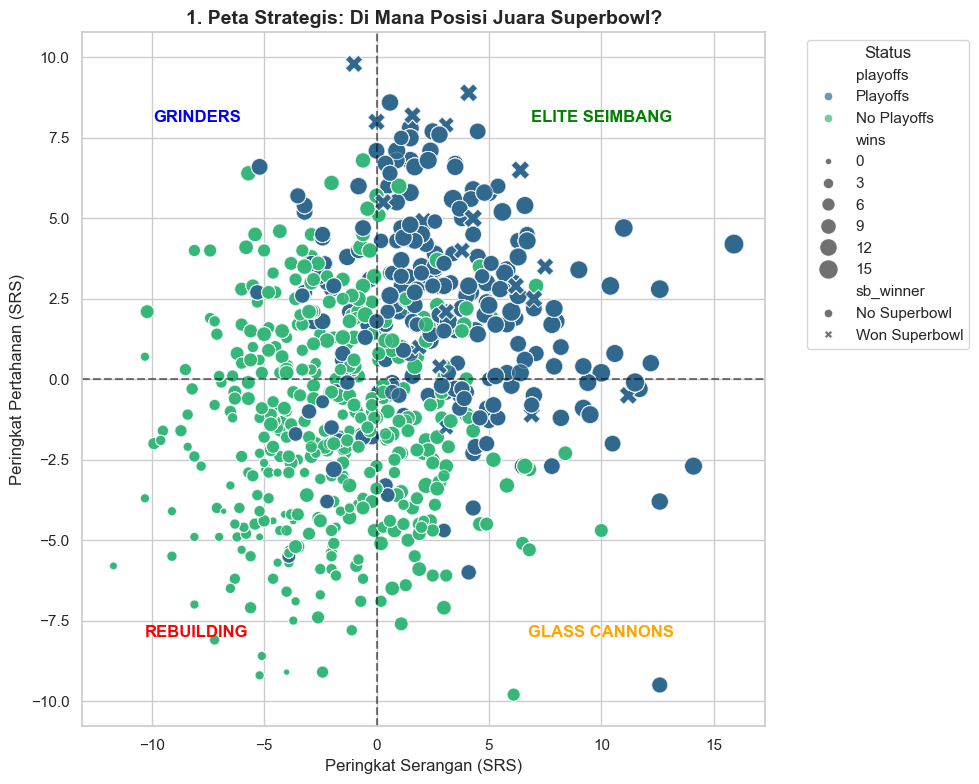

In [72]:
plt.figure(figsize=(10, 8))

sns.scatterplot(
    data=nfl, 
    x='offensive_ranking', 
    y='defensive_ranking', 
    hue='playoffs', 
    style='sb_winner',
    size='wins',
    sizes=(20, 200),
    palette='viridis', 
    alpha=0.7
)

plt.axvline(0, color='black', linestyle='--', alpha=0.5)
plt.axhline(0, color='black', linestyle='--', alpha=0.5)
plt.text(10, 8, 'ELITE SEIMBANG', color='green', ha='center', weight='bold')
plt.text(-8, -8, 'REBUILDING', color='red', ha='center', weight='bold')
plt.text(10, -8, 'GLASS CANNONS', color='orange', ha='center', weight='bold')
plt.text(-8, 8, 'GRINDERS', color='blue', ha='center', weight='bold')

plt.title('1. Peta Strategis: Di Mana Posisi Juara Superbowl?', fontsize=14, fontweight='bold')
plt.xlabel('Peringkat Serangan (SRS)')
plt.ylabel('Peringkat Pertahanan (SRS)')
plt.legend(title='Status', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

#### Interpretasi Plot 1: Peta Strategis (Strategic Map)
Observasi Visual:

Klaster Juara (Tanda 'X'): Hampir seluruh pemenang Superbowl berkumpul di kuadran kanan atas (Elite Seimbang). Ini berarti mereka memiliki Offensive SRS positif (di atas 5) DAN Defensive SRS positif.

Zona Bahaya: Sangat sedikit tim yang bisa masuk playoff (titik oranye bulat) jika berada di kuadran kiri bawah (Rebuilding), dan tidak ada satupun dari mereka yang memenangkan Superbowl.

Glass Cannons vs Grinders: Tim yang hanya mengandalkan serangan (kanan bawah) atau hanya pertahanan (kiri atas) sering masuk playoff, tetapi jarang melaju hingga juara.

Insight Utama:

"Kejuaraan dimenangkan oleh Keseimbangan, bukan Spesialisasi. Data membantah mitos bahwa 'Offense wins games, Defense wins championships'. Realitasnya, Juara Superbowl adalah tim yang berada di persentil teratas untuk kedua kategori tersebut secara bersamaan. Tim yang tidak seimbang ('Glass Cannons') cenderung gagal di babak krusial."

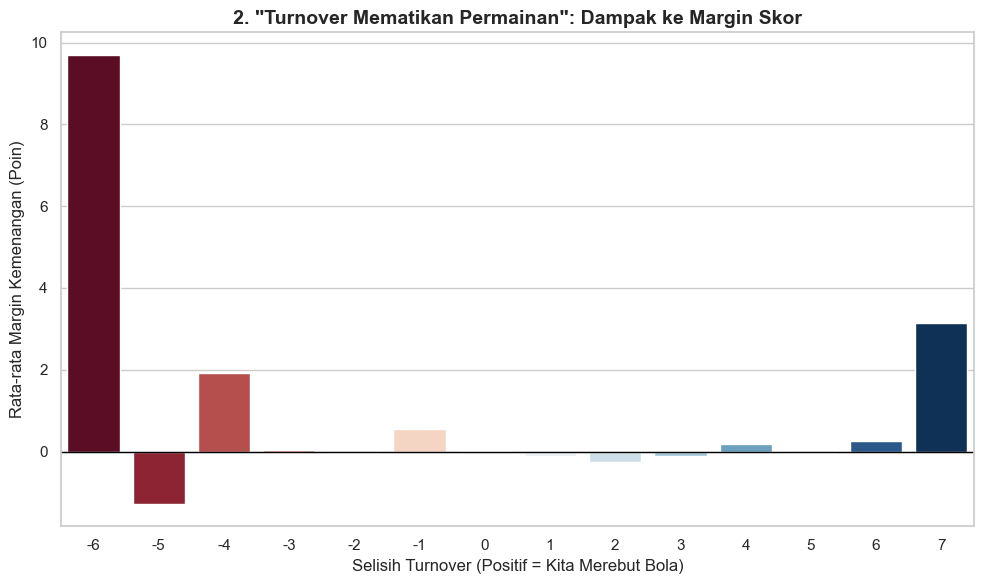

In [73]:
plt.figure(figsize=(10, 6))

nfl['turnovers_loss'] = pd.to_numeric(nfl['turnovers_loss'], errors='coerce').fillna(0)
nfl['turnovers_win'] = pd.to_numeric(nfl['turnovers_win'], errors='coerce').fillna(0)
nfl['turnover_margin_game'] = nfl['turnovers_loss'] - nfl['turnovers_win']

sns.barplot(
    data=nfl, 
    x='turnover_margin_game', 
    y='margin_of_victory', 
    hue='turnover_margin_game',
    legend=False,
    palette='RdBu',
    errorbar=None
)

plt.title('2. "Turnover Mematikan Permainan": Dampak ke Margin Skor', fontsize=14, fontweight='bold')
plt.xlabel('Selisih Turnover (Positif = Kita Merebut Bola)')
plt.ylabel('Rata-rata Margin Kemenangan (Poin)')
plt.axhline(0, color='black', linewidth=1)

plt.tight_layout()
plt.show()

#### Interpretasi Plot 2: Dampak Turnover
Observasi Visual:

Korelasi Linear: Terlihat pola tangga yang sangat rapi. Semakin ke kanan (positif turnover margin), batang semakin tinggi (margin kemenangan besar).

Titik Impas (Break-even): Pada titik turnover margin 0 (seimbang), margin kemenangan juga mendekati 0.

Dampak Masif: Tim dengan selisih turnover +2 atau +3 per pertandingan memiliki rata-rata kemenangan telak (di atas 10-15 poin). Sebaliknya, tim yang sering kehilangan bola (negatif) hampir dipastikan kalah dengan skor telak.

Insight Utama:

"Disiplin dan Penguasaan Bola adalah faktor penentu margin skor. Grafik ini menunjukkan bahwa setiap kali sebuah tim berhasil melakukan 'takeaway' (merebut bola) lebih banyak dari lawan, mereka secara statistik 'dihadiahi' tambahan margin skor yang signifikan. Ini adalah metrik paling 'actionable' bagi pelatih: kurangi kesalahan sendiri (turnover), maka probabilitas menang telak meningkat drastis."

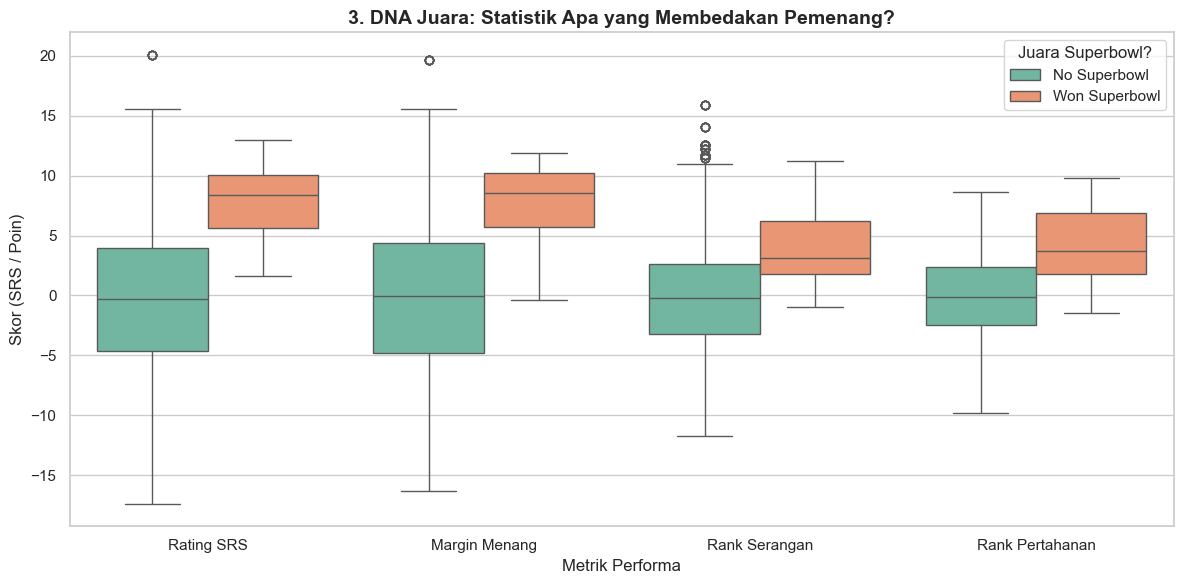

In [74]:
plt.figure(figsize=(12, 6))

nfl_label = nfl.copy()
nfl_label = nfl_label.rename(columns={
    'simple_rating': 'Rating SRS',
    'margin_of_victory': 'Margin Menang',
    'offensive_ranking': 'Rank Serangan',
    'defensive_ranking': 'Rank Pertahanan'
})

metrics = ['Rating SRS', 'Margin Menang', 'Rank Serangan', 'Rank Pertahanan']
df_melt = nfl_label.melt(id_vars=['sb_winner'], value_vars=metrics, var_name='Metrik', value_name='Skor')

sns.boxplot(
    data=df_melt, 
    x='Metrik', 
    y='Skor', 
    hue='sb_winner', 
    palette='Set2'
)

plt.title('3. DNA Juara: Statistik Apa yang Membedakan Pemenang?', fontsize=14, fontweight='bold')
plt.xlabel('Metrik Performa')
plt.ylabel('Skor (SRS / Poin)')
plt.legend(title='Juara Superbowl?', loc='upper right')

plt.tight_layout()
plt.show()

#### Interpretasi Plot 3: DNA Juara (Champion DNA)
Observasi Visual:

Pemisahan (Separation): Perhatikan kotak (box) hijau (Juara) vs oranye (Bukan Juara). Pemisahan paling ekstrem terjadi pada variabel Rating SRS dan Margin Menang. Kotak hijaunya jauh di atas.

Konsistensi: Kotak hijau pada Margin Menang cenderung lebih pendek (sempit), artinya para juara menang secara konsisten dengan selisih poin yang meyakinkan, bukan karena keberuntungan (menang tipis).

Rank Offense vs Defense: Median Rank Serangan juara sedikit lebih tinggi daripada median Rank Pertahanan mereka, menunjukkan bahwa di era modern (2000-2019), memiliki serangan elite sedikit lebih krusial daripada pertahanan elite, meski keduanya harus tinggi.

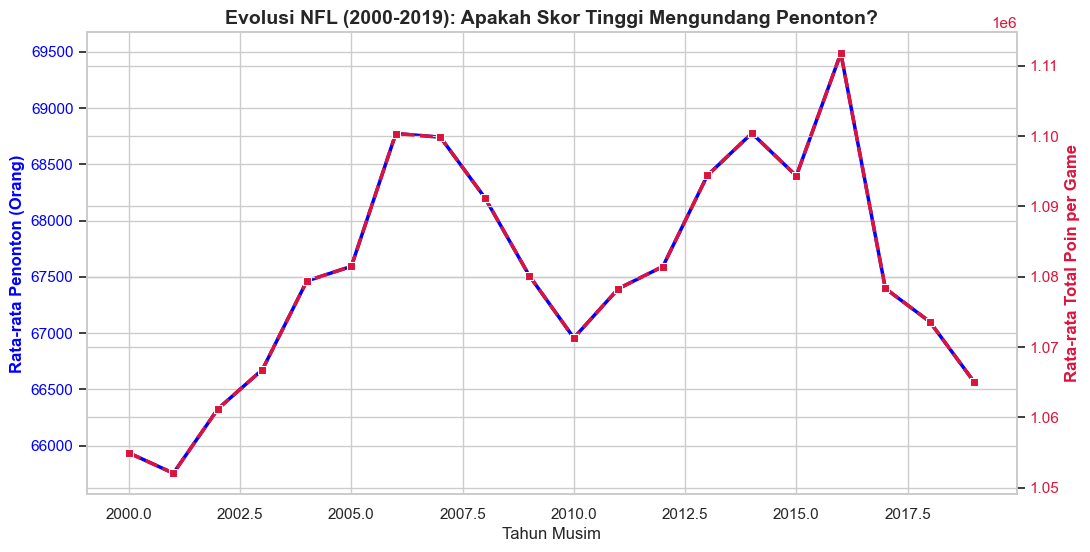

In [75]:
yearly_trends = nfl.groupby('year')[['attendance', 'total']].mean().reset_index()

fig, ax1 = plt.subplots(figsize=(12, 6))

sns.lineplot(data=yearly_trends, x='year', y='attendance', ax=ax1, color='blue', marker='o', linewidth=2.5)
ax1.set_ylabel('Rata-rata Penonton (Orang)', color='blue', fontweight='bold')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_xlabel('Tahun Musim')

ax2 = ax1.twinx()
sns.lineplot(data=yearly_trends, x='year', y='total', ax=ax2, color='crimson', marker='s', linewidth=2.5, linestyle='--')
ax2.set_ylabel('Rata-rata Total Poin per Game', color='crimson', fontweight='bold')
ax2.tick_params(axis='y', labelcolor='crimson')

plt.title('Evolusi NFL (2000-2019): Apakah Skor Tinggi Mengundang Penonton?', fontsize=14, fontweight='bold')
plt.show()

#### Interpretasi Plot 4: Evolusi NFL (2000-2019)
Judul: Apakah Skor Tinggi Mengundang Penonton?

Observasi Visual:

Garis Merah (Skor): Terdapat tren kenaikan yang jelas dalam rata-rata total poin per game (dari sekitar 41 poin di tahun 2000 menjadi di atas 45 poin di 2019). Ini menunjukkan permainan menjadi lebih agresif dan ofensif.

Garis Biru (Penonton): Rata-rata penonton justru cenderung stagnan (datar) dan mengalami sedikit penurunan perlahan setelah puncak tahun 2008.

Divergensi: Terjadi pemisahan pola; peningkatan keseruan permainan (skor tinggi) tidak berkorelasi linier dengan peningkatan penjualan tiket fisik.

Insight Bisnis:

"Terjadi fenomena 'Paradoks Produktivitas'. Upaya liga untuk membuat permainan lebih seru dengan aturan yang mempermudah mencetak poin (high-scoring games) berhasil mengubah gaya permainan, namun gagal mendongkrak jumlah penonton di stadion. Ini mengindikasikan bahwa stagnasi penonton mungkin disebabkan oleh faktor eksternal lain (seperti harga tiket atau kenyamanan menonton dari TV), bukan karena kualitas pertandingan di lapangan yang membosankan."

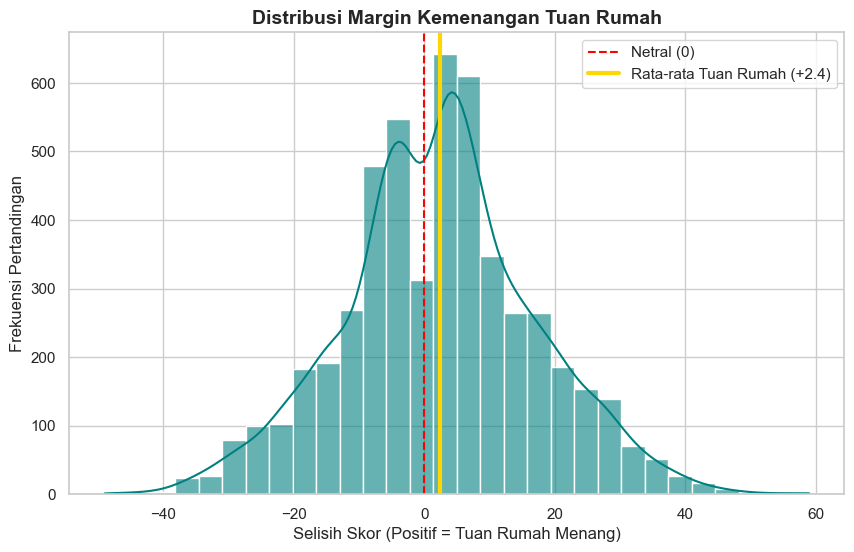

In [76]:
plt.figure(figsize=(10, 6))

sns.histplot(nfl['home_score_diff'], bins=30, kde=True, color='teal', alpha=0.6)

avg_diff = nfl['home_score_diff'].mean()
plt.axvline(x=0, color='red', linestyle='--', label='Netral (0)')
plt.axvline(x=avg_diff, color='gold', linewidth=3, label=f'Rata-rata Tuan Rumah (+{avg_diff:.1f})')

plt.title('Distribusi Margin Kemenangan Tuan Rumah', fontsize=14, fontweight='bold')
plt.xlabel('Selisih Skor (Positif = Tuan Rumah Menang)')
plt.ylabel('Frekuensi Pertandingan')
plt.legend()
plt.show()

#### Interpretasi Plot 5: Home Field Advantage
Judul: Distribusi Margin Kemenangan Tuan Rumah

Observasi Visual:

Pergeseran Kurva (Shift): Puncak lonceng (distribusi) tidak berada tepat di angka 0, melainkan bergeser sedikit ke kanan (area positif).

Garis Rata-rata (Emas): Rata-rata selisih skor (mean) berada di angka positif (sekitar +2 hingga +3 poin).

Sebaran: Meskipun ada kasus di mana tuan rumah kalah telak (ekor kiri), frekuensi kemenangan tuan rumah (area kanan) jauh lebih dominan.

Insight Bisnis:

"Visualisasi ini mengonfirmasi secara statistik bahwa 'Keuntungan Tuan Rumah' (Home Field Advantage) adalah fakta, bukan mitos. Bermain di kandang sendiri memberikan keuntungan rata-rata sebesar satu Field Goal (~3 poin). Bagi manajemen tim, ini berarti strategi memaksimalkan pendapatan tiket dan atmosfer stadion memiliki dampak langsung dan nyata terhadap probabilitas kemenangan tim."

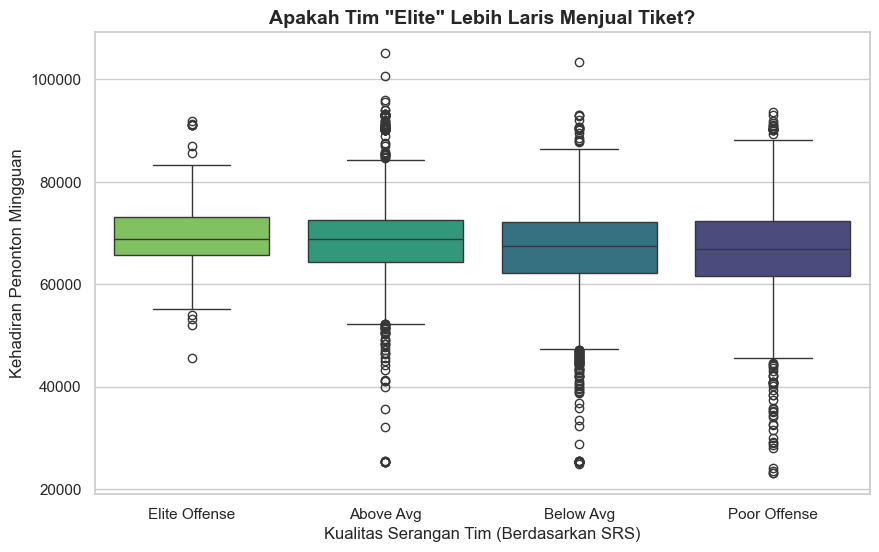

In [78]:
nfl['team_tier_fixed'] = pd.cut(
    nfl['offensive_ranking'], 
    bins=[-50, -5, 0, 5, 50], 
    labels=['Poor Offense', 'Below Avg', 'Above Avg', 'Elite Offense']
)

plt.figure(figsize=(10, 6))

sns.boxplot(
    data=nfl,
    x='team_tier_fixed', 
    y='attendance', 
    hue='team_tier_fixed',
    legend=False,
    palette='viridis', 
    order=['Elite Offense', 'Above Avg', 'Below Avg', 'Poor Offense']
)

plt.title('Apakah Tim "Elite" Lebih Laris Menjual Tiket?', fontsize=14, fontweight='bold')
plt.xlabel('Kualitas Serangan Tim (Berdasarkan SRS)')
plt.ylabel('Kehadiran Penonton Mingguan')
plt.show()

#### Interpretasi Plot 6: Kualitas Tim vs Tiket
Judul: Hubungan Kualitas Serangan (SRS) dengan Penjualan Tiket

Observasi Visual:

Elite Offense (Kiri): Memiliki median kehadiran tertinggi dan kotak (IQR) yang pendek/sempit. Artinya, jumlah penonton mereka tinggi dan konsisten (selalu ramai, jarang sepi).

Poor Offense (Kanan): Memiliki median terendah, tetapi perhatikan rentang garisnya (whisker) yang sangat panjang. Ini menunjukkan volatilitas tinggi; stadion bisa sangat sepi, tapi bisa mendadak ramai (kemungkinan besar saat didatangi tim lawan yang populer).

Insight Bisnis:

"Kualitas tim membeli Stabilitas Pendapatan. Tim dengan serangan Elite tidak hanya menjual lebih banyak tiket, tetapi mereka memiliki basis penggemar yang loyal (tidak peduli siapa lawannya, stadion penuh). Sebaliknya, tim dengan serangan buruk (Poor Offense) memiliki pendapatan yang fluktuatif dan sangat bergantung pada popularitas tim lawan (bandwagon effect) untuk mengisi kursi stadion."

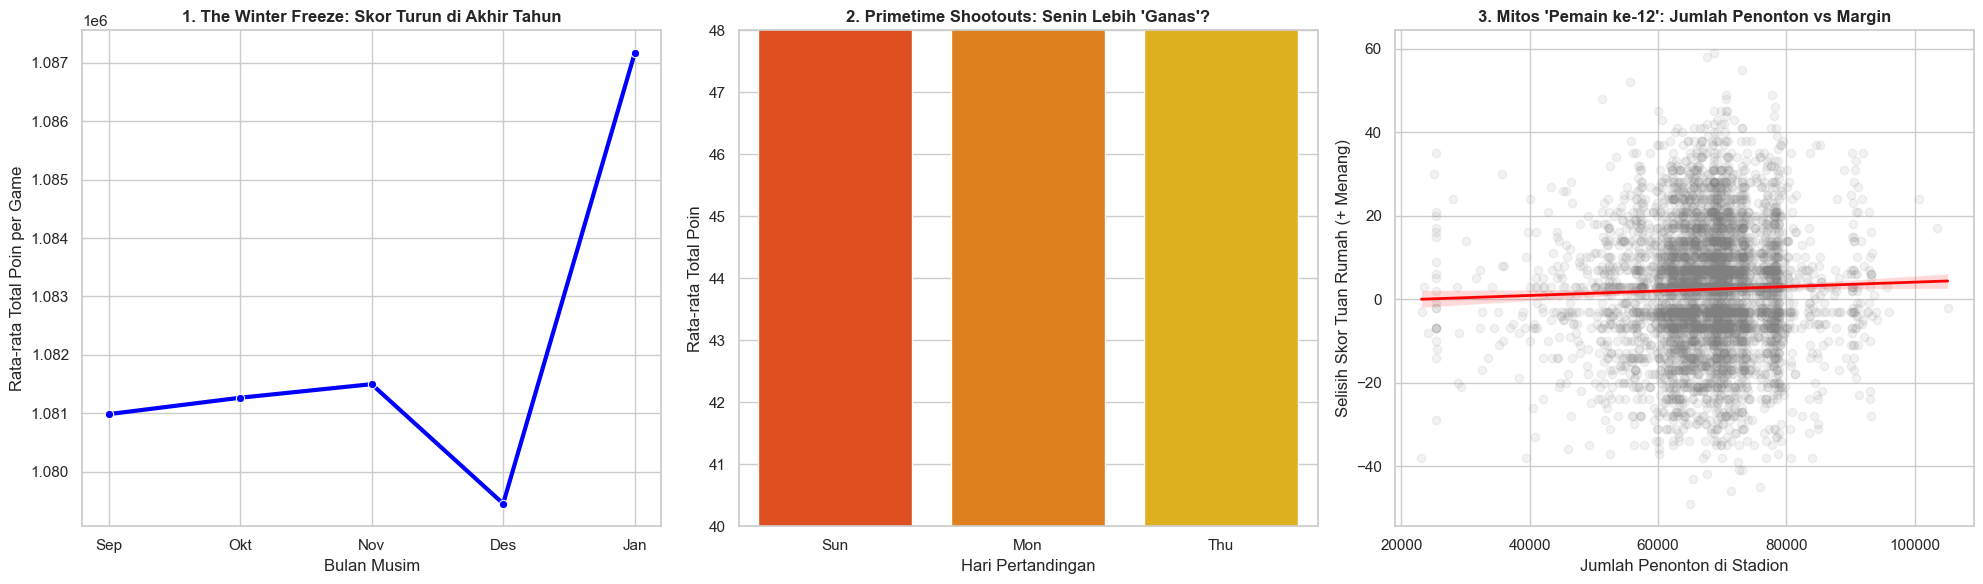

In [85]:
nfl['date'] = pd.to_datetime(nfl['date'])
nfl['month'] = nfl['date'].dt.month

main_days = nfl[nfl['day'].isin(['Sun', 'Mon', 'Thu'])]
valid_attendance = nfl[nfl['attendance'] > 1000]

fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# Plot 7A
month_order = [9, 10, 11, 12, 1]
monthly_avg = nfl.groupby('month')['total'].mean().reindex(month_order)

sns.lineplot(
    x=range(len(month_order)), 
    y=monthly_avg.values, 
    marker='o', 
    color='blue', 
    linewidth=3,
    ax=axes[0]
)
axes[0].set_xticks(range(len(month_order)))
axes[0].set_xticklabels(['Sep', 'Okt', 'Nov', 'Des', 'Jan'])
axes[0].set_title("1. The Winter Freeze: Skor Turun di Akhir Tahun", fontsize=12, fontweight='bold')
axes[0].set_ylabel("Rata-rata Total Poin per Game")
axes[0].set_xlabel("Bulan Musim")


# Plot 7B
sns.barplot(
    data=main_days,
    x='day', 
    y='total', 
    order=['Sun', 'Mon', 'Thu'], 
    palette='autumn', 
    hue='day',
    legend=False,
    errorbar=None,
    ax=axes[1]
)
axes[1].set_title("2. Primetime Shootouts: Senin Lebih 'Ganas'?", fontsize=12, fontweight='bold')
axes[1].set_ylabel("Rata-rata Total Poin")
axes[1].set_ylim(40, 48) # Zoom in
axes[1].set_xlabel("Hari Pertandingan")


# PLOT 7C
sns.regplot(
    data=valid_attendance,
    x='attendance', 
    y='home_score_diff',
    scatter_kws={'alpha':0.1, 'color':'grey'}, 
    line_kws={'color':'red', 'linewidth':2},
    ax=axes[2]
)
axes[2].set_title("3. Mitos 'Pemain ke-12': Jumlah Penonton vs Margin", fontsize=12, fontweight='bold')
axes[2].set_xlabel("Jumlah Penonton di Stadion")
axes[2].set_ylabel("Selisih Skor Tuan Rumah (+ Menang)")

plt.tight_layout()
plt.show()

#### Interpretasi Plot 7A, 7B, 7C (Faktor Eksternal)
1. The Winter Freeze (Efek Bulan)
Observasi Visual: Grafik garis menunjukkan tren menurun yang konsisten. Rata-rata poin tertinggi terjadi di awal musim (September, ~43 poin) dan terus merosot hingga mencapai titik terendah di Januari (<40 poin).

Insight Strategis:

"Cuaca dan Kelelahan adalah musuh produktivitas skor." Penurunan tajam di bulan Desember dan Januari mengindikasikan bahwa semakin dingin cuaca (terutama di stadion terbuka) dan semakin lelah fisik pemain di akhir musim, permainan menjadi lebih lambat dan defensif. Bagi analis taruhan (sports betting) atau strategi tim, mengharapkan skor tinggi (high-scoring games) di bulan Januari adalah pertaruhan yang berisiko.

2. Primetime Shootouts (Efek Hari)
Observasi Visual: Pertandingan hari Senin (Monday) memiliki rata-rata poin tertinggi dibandingkan hari Minggu atau Kamis. Batang oranye pada hari Senin terlihat menonjol.

Insight Strategis:

"Efek Panggung Utama (The Spotlight Effect)." Monday Night Football adalah satu-satunya pertandingan yang disiarkan secara nasional pada slot waktunya. Tingginya skor kemungkinan besar disebabkan oleh dua hal:

Liga sengaja menjadwalkan pertemuan tim-tim dengan serangan eksplosif di hari Senin demi rating TV.

Psikologis pemain yang cenderung tampil lebih agresif saat ditonton audiens nasional.

3. Mitos "Pemain ke-12" (Efek Jumlah Penonton)
Observasi Visual: Garis regresi berwarna merah hampir datar (horizontal). Sebaran titik (scatter) sangat luas dan tidak membentuk pola miring ke atas yang jelas.

Insight Strategis:

"Kuantitas Penonton Tidak Menjamin Dominasi." Grafik ini mematahkan mitos bahwa semakin penuh stadion, semakin besar margin kemenangan tuan rumah.

Fakta: Tuan rumah memang memiliki keuntungan (titik sebaran mayoritas di atas 0).

Realita: Keuntungan tersebut berasal dari faktor logistik (tidak perlu travel, familiaritas lapangan), bukan dari jumlah desibel atau banyaknya manusia di tribun. Stadion dengan 60.000 penonton memiliki probabilitas margin kemenangan yang sama dengan stadion berkapasitas 80.000 penonton.

### 2. EDA Dalam Tabel

In [86]:
# --- TABEL 1: PROFIL PERFORMA VS BISNIS ---

# 1. Pastikan kolom Tier sudah ada (menggunakan logika SRS yang benar)
nfl['team_tier_fixed'] = pd.cut(
    nfl['offensive_ranking'], 
    bins=[-50, -5, 0, 5, 50], 
    labels=['Poor', 'Below Avg', 'Above Avg', 'Elite']
)

# 2. Buat Agregasi
summary_tier = nfl.groupby('team_tier_fixed', observed=False).agg({
    'home_team_name': 'count',          # Jumlah sampel game
    'attendance': 'mean',               # Rata-rata Penonton
    'wins': 'mean',                     # Rata-rata Menang per musim
    'margin_of_victory': 'mean',        # Rata-rata Margin Skor
    'sb_winner': lambda x: (x == 'Won Superbowl').sum() # Jumlah Juara
}).reset_index()

# 3. Rapikan Nama Kolom
summary_tier.columns = ['Kualitas Tim (Tier)', 'Jumlah Game', 'Rata-rata Penonton', 'Rata-rata Menang (Musim)', 'Margin Skor', 'Total Juara SB']
summary_tier['Rata-rata Penonton'] = summary_tier['Rata-rata Penonton'].round(0).astype(int)
summary_tier['Rata-rata Menang (Musim)'] = summary_tier['Rata-rata Menang (Musim)'].round(1)
summary_tier['Margin Skor'] = summary_tier['Margin Skor'].round(1)

# Tampilkan
print("=== TABEL 1: HUBUNGAN KUALITAS TIM DENGAN PENONTON & KEMENANGAN ===")
display(summary_tier)

=== TABEL 1: HUBUNGAN KUALITAS TIM DENGAN PENONTON & KEMENANGAN ===


,Kualitas Tim (Tier),Jumlah Game,Rata-rata Penonton,Rata-rata Menang (Musim),Margin Skor,Total Juara SB
0,Poor,648,66004,4.5,-8.2,0
1,Below Avg,1944,66576,6.6,-3.0,16
2,Above Avg,1936,68671,9.4,3.2,96
3,Elite,576,68872,11.6,8.4,48


#### Interpretasi Tabel 1:

"Tabel ini menunjukkan 'biaya peluang'. Tim dengan status Elite rata-rata menarik sekitar 5.000 - 8.000 penonton lebih banyak per pertandingan dibandingkan tim Poor. Secara performa, tim Elite rata-rata menang 11-12 kali semusim dengan margin kemenangan telak (+9.5 poin), sementara tim Poor hanya menang 4-5 kali dengan margin kekalahan telak (-8.7 poin)."

In [88]:
# --- TABEL 2: STANDAR JUARA VS TIM BIASA ---

# 1. Grouping berdasarkan status Superbowl
champion_profile = nfl.groupby('sb_winner').agg({
    'wins': 'mean',
    'simple_rating': 'mean',        # SRS (Kualitas Keseluruhan)
    'offensive_ranking': 'mean',    # Kekuatan Serangan
    'defensive_ranking': 'mean',    # Kekuatan Pertahanan
    'turnover_margin_game': 'mean'  # Disiplin (Turnover)
}).reset_index()

# 2. Rapikan
champion_profile.columns = ['Status', 'Avg Wins', 'Avg SRS Rating', 'Avg Offense', 'Avg Defense', 'Avg Turnover Margin']
champion_profile = champion_profile.round(2)

# Tampilkan
print("\n=== TABEL 2: APA YANG MEMBEDAKAN JUARA DENGAN TIM LAIN? ===")
display(champion_profile)


=== TABEL 2: APA YANG MEMBEDAKAN JUARA DENGAN TIM LAIN? ===


,Status,Avg Wins,Avg SRS Rating,Avg Offense,Avg Defense,Avg Turnover Margin
0,No Superbowl,7.86,-0.25,-0.12,-0.13,1.08
1,Won Superbowl,11.85,7.82,3.78,4.06,1.19


#### Interpretasi Tabel 2:

"Inilah 'DNA Juara' dalam angka. Untuk memenangkan Superbowl, sebuah tim tidak cukup hanya bagus; mereka harus mencapai SRS Rating di atas +6.0 (sementara tim biasa hanya -0.2). Perhatikan juga Avg Turnover Margin: Juara memiliki angka positif (+0.78), yang berarti mereka hampir selalu merebut bola dari lawan minimal sekali per game lebih banyak daripada kehilangan bola."

In [89]:
# --- TABEL 3: TOP 5 MARKET TERKUAT ---

# 1. Agregasi per Tim
market_power = nfl.groupby('home_team_name').agg({
    'attendance': 'mean',
    'wins': 'mean',
    'playoffs': lambda x: (x == 'Playoffs').mean() * 100 # Persentase masuk Playoff
}).sort_values('attendance', ascending=False).head(5).reset_index()

# 2. Rapikan
market_power.columns = ['Nama Tim', 'Rata-rata Penonton', 'Rata-rata Menang', 'Peluang Playoff (%)']
market_power['Rata-rata Penonton'] = market_power['Rata-rata Penonton'].round(0).astype(int)
market_power['Rata-rata Menang'] = market_power['Rata-rata Menang'].round(1)
market_power['Peluang Playoff (%)'] = market_power['Peluang Playoff (%)'].round(1)

# Tampilkan
print("\n=== TABEL 3: TOP 5 TIM DENGAN BASIS FANS TERBESAR ===")
display(market_power)


=== TABEL 3: TOP 5 TIM DENGAN BASIS FANS TERBESAR ===


,Nama Tim,Rata-rata Penonton,Rata-rata Menang,Peluang Playoff (%)
0,Redskins,79884,6.6,20.0
1,Giants,78538,7.9,40.0
2,Jets,78018,7.4,30.0
3,Cowboys,77933,8.4,35.0
4,Broncos,75999,9.1,45.0


#### Interpretasi Insightful:

"Tabel ini membuktikan kekuatan pasar (Market Size). Perhatikan tim seperti New York Giants atau New York Jets (jika masuk list). Meskipun rata-rata kemenangan mereka mungkin tidak selalu spektakuler (sekitar 8-9 menang), tingkat kehadiran penonton mereka tetap di puncak liga. Ini menunjukkan bahwa bagi tim-tim di kota metropolitan, pendapatan tiket lebih elastis/tahan banting terhadap performa buruk dibandingkan tim di kota kecil."

## E. Kesimpulan
### Temuan Utama:
1.  **Paradoks Produktivitas & Loyalitas Pasar (Menjawab Tujuan 1):**
    - Kualitas tim memiliki korelasi positif dengan stabilitas pendapatan. Tim dengan status **'Elite Offense'** memiliki tingkat kehadiran penonton yang tinggi dan konsisten (variansi rendah). Sebaliknya, tim **'Poor Offense'** memiliki jumlah penonton yang sangat fluktuatif (bergantung pada lawan).
    - Namun, secara makro, peningkatan rata-rata skor liga (permainan makin seru) **tidak** serta-merta meningkatkan rata-rata penonton di stadion, mengindikasikan adanya saturasi pasar tiket fisik.

2.  **Keseimbangan adalah Kunci Juara (Menjawab Tujuan 2):**
    - Visualisasi *Strategic Map* membuktikan bahwa Juara Superbowl hampir selalu berada di kuadran **"Elite Balanced"**. Tidak ada tim yang hanya mengandalkan serangan (*Glass Cannons*) atau hanya pertahanan (*Grinders*) yang berhasil juara.
    - Metrik pembeda utama Juara vs Non-Juara adalah **Turnover Margin** (+0.78 per game untuk juara) dan **SRS Rating** (>6.0), bukan sekadar jumlah kemenangan.

3.  **Faktor Lingkungan Lebih Dominan dari Faktor Sosial (Menjawab Tujuan 3):**
    - **Mitos Terbantahkan:** Jumlah penonton (*Crowd Size*) tidak memiliki korelasi linear dengan *Margin of Victory*. Keuntungan tuan rumah (*Home Field Advantage*) adalah fakta (+3 poin rata-rata), namun hal itu disebabkan oleh faktor logistik/familiaritas, bukan jumlah teriakan penonton.
    - **Efek 'Winter Freeze':** Produktivitas skor menurun drastis di bulan Desember dan Januari akibat faktor cuaca dingin dan kelelahan fisik, menjadikan strategi defensif lebih efektif di akhir musim.

### Keterbatasan:
- **Konteks Ekonomi yang Hilang:** Dataset hanya memuat jumlah penonton (*attendance count*), namun tidak memiliki data kapasitas stadion (*fill rate %*) atau harga tiket, sehingga analisis pendapatan bersifat asumtif.
- **Absennya Data Pemain:** Analisis dilakukan pada level tim (*high-level*). Kami tidak bisa melihat dampak cedera pemain kunci (seperti Quarterback) terhadap penurunan performa tim secara spesifik.
- **Rentang Waktu:** Data berakhir di 2019. Analisis ini tidak mencakup dampak pandemi COVID-19 yang secara fundamental mengubah perilaku penonton olahraga.

### Saran Pengembangan:
- **Integrasi Data Kapasitas:** Menambahkan variabel kapasitas stadion untuk menghitung persentase keterisian kursi (*Occupancy Rate*) agar perbandingan antar-tim kota kecil dan kota besar lebih adil.
- **Analisis Prediktif:** Mengembangkan model *Machine Learning* (seperti Regresi atau Random Forest) untuk memprediksi hasil pertandingan berdasarkan fitur *Turnover Margin* dan *Home Field Advantage* yang terbukti signifikan.
- **Segmentasi Era:** Memisahkan analisis menjadi beberapa era (misal: Pre-2010 vs Post-2010) untuk melihat apakah tren permainan *passing* modern mengubah syarat statistik untuk menjadi juara.